In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt

%matplotlib inline


import seaborn as sns



from sklearn.model_selection import train_test_split

import numpy as np
from scipy import stats


from sklearn import metrics

In [3]:
df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
df.shape

(5000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [6]:

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [10]:
df.nunique() # Number of unique values in a column

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [11]:
# Number of people with zero mortgage
number_of_zero_mortgage = df[df['Mortgage'] == 0].count()
print(number_of_zero_mortgage.Mortgage)

3462


In [12]:
# Number of people with zero credit card balance
number_of_zero_credit_card = df[df['CCAvg'] == 0].count()
print(number_of_zero_credit_card.CCAvg)

106


In [13]:
#Value counts of all categorical columns
df_value_counts_cat = df.drop(['ID','Age','Experience','ZIP Code','CCAvg','Mortgage','Income'],axis=1)
#print(df_value_counts_cat.columns)
for x in df_value_counts_cat.columns:
    print(df[x].value_counts())

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64
1    2096
3    1501
2    1403
Name: Education, dtype: int64
0    4520
1     480
Name: Personal Loan, dtype: int64
0    4478
1     522
Name: Securities Account, dtype: int64
0    4698
1     302
Name: CD Account, dtype: int64
1    2984
0    2016
Name: Online, dtype: int64
0    3530
1    1470
Name: CreditCard, dtype: int64


In [14]:
cr_df = df.drop('ID', axis =1 ) 
cr_df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


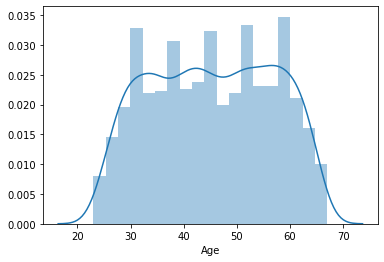

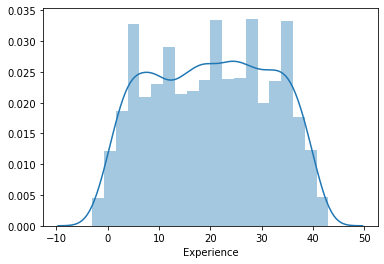

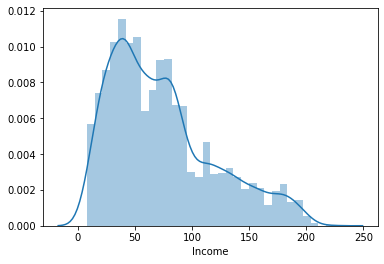

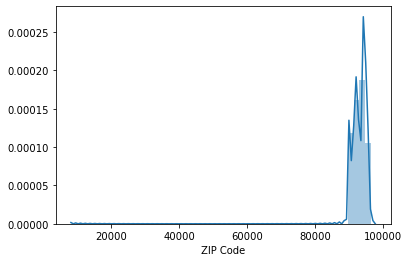

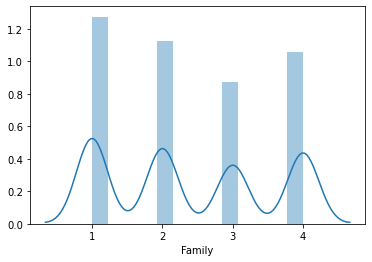

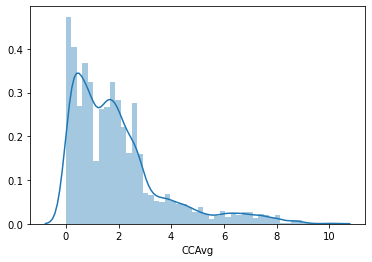

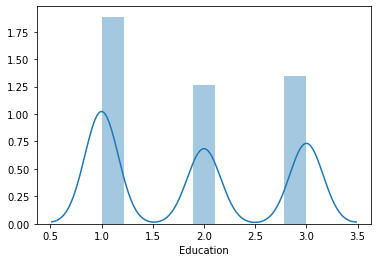

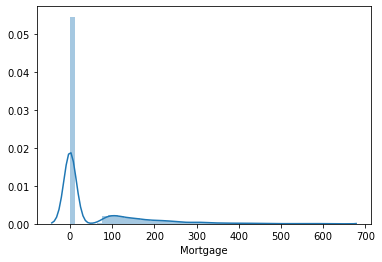

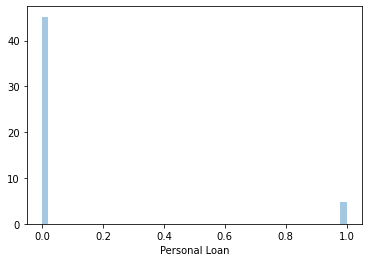

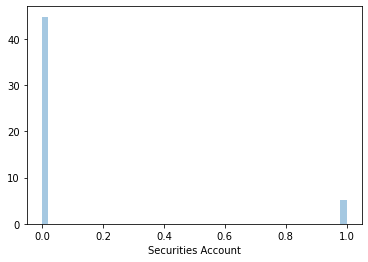

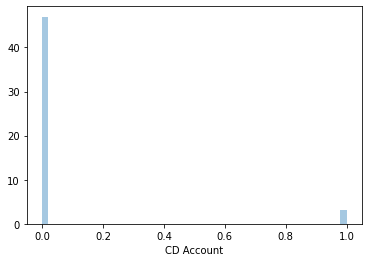

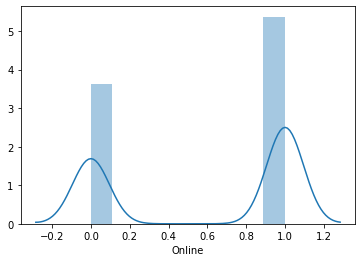

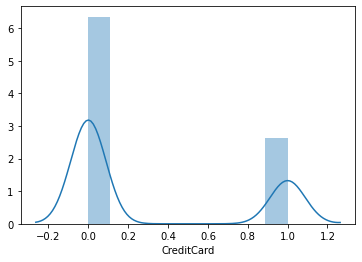

In [50]:
# distplot for continous columns
for i in cr_df.columns:
    sns.distplot(df[i])
    plt.show()

In [15]:
#Convert X & Y variable to a categorical variable wherever relevant
cr_df['Family'] = cr_df['Family'].astype('category')
cr_df['Education'] = cr_df['Education'].astype('category')
cr_df['Personal Loan'] = cr_df['Personal Loan'].astype('category')
cr_df['Securities Account'] = cr_df['Securities Account'].astype('category')
cr_df['CD Account'] = cr_df['CD Account'].astype('category')
cr_df['Online'] = cr_df['Online'].astype('category')
cr_df['CreditCard'] = cr_df['CreditCard'].astype('category')


In [16]:
cr_df.dtypes

Age                      int64
Experience               int64
Income                   int64
ZIP Code                 int64
Family                category
CCAvg                  float64
Education             category
Mortgage                 int64
Personal Loan         category
Securities Account    category
CD Account            category
Online                category
CreditCard            category
dtype: object

In [17]:
for i in list(cr_df.columns[cr_df.dtypes=='category']):   
    print(cr_df[i].value_counts(normalize=True))
    print()

1    0.2944
2    0.2592
4    0.2444
3    0.2020
Name: Family, dtype: float64

1    0.4192
3    0.3002
2    0.2806
Name: Education, dtype: float64

0    0.904
1    0.096
Name: Personal Loan, dtype: float64

0    0.8956
1    0.1044
Name: Securities Account, dtype: float64

0    0.9396
1    0.0604
Name: CD Account, dtype: float64

1    0.5968
0    0.4032
Name: Online, dtype: float64

0    0.706
1    0.294
Name: CreditCard, dtype: float64



In [18]:

prop_Y = cr_df['Personal Loan'].value_counts(normalize=True)
print(prop_Y)

0    0.904
1    0.096
Name: Personal Loan, dtype: float64


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [21]:
cr_df.isnull().sum()

Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [32]:
sns.pairplot(df)

In [26]:
pd.crosstab(cr_df['Family'],cr_df['Personal Loan'],normalize='index')

Personal Loan,0,1
Family,,
1,0.927310,0.072690
2,0.918210,0.081790
3,0.868317,0.131683
4,0.890344,0.109656


In [27]:
 pd.crosstab(cr_df['Online'],cr_df['Personal Loan'],normalize='index')

Personal Loan,0,1
Online,,
0,0.90625,0.09375
1,0.90248,0.09752


In [29]:
pd.crosstab(cr_df['CD Account'],cr_df['Personal Loan'],normalize='columns')

Personal Loan,0,1
CD Account,,
0,0.964159,0.708333
1,0.035841,0.291667


In [30]:
pd.crosstab(cr_df['Securities Account'],cr_df['Personal Loan'],normalize='index')

Personal Loan,0,1
Securities Account,,
0,0.906208,0.093792
1,0.885057,0.114943


In [31]:
pd.crosstab(cr_df['CreditCard'],cr_df['Personal Loan'],normalize='index')

Personal Loan,0,1
CreditCard,,
0,0.904533,0.095467
1,0.902721,0.097279


In [60]:
## Define X and Y variables

X = cr_df.drop('Personal Loan', axis=1)

Y = cr_df['Personal Loan']     

# change data typr to 'category' because it was object type which is not recognized by model

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,49,91107,4,1.6,1,0,1,0,0,0
1,45,34,90089,3,1.5,1,0,1,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,29,40,92697,1,1.9,3,0,0,0,1,0
4996,30,15,92037,4,0.4,1,85,0,0,1,0
4997,63,24,93023,2,0.3,3,0,0,0,0,0
4998,65,49,90034,3,0.5,2,0,0,0,1,0


In [61]:

X = pd.get_dummies(X, drop_first=True)
X

,Age,Income,ZIP Code,CCAvg,Mortgage,Family_2,Family_3,Family_4,Education_2,Education_3,Securities Account_1,CD Account_1,Online_1,CreditCard_1
0,25,49,91107,1.6,0,0,0,1,0,0,1,0,0,0
1,45,34,90089,1.5,0,0,1,0,0,0,1,0,0,0
2,39,11,94720,1.0,0,0,0,0,0,0,0,0,0,0
3,35,100,94112,2.7,0,0,0,0,1,0,0,0,0,0
4,35,45,91330,1.0,0,0,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,40,92697,1.9,0,0,0,0,0,1,0,0,1,0
4996,30,15,92037,0.4,85,0,0,1,0,0,0,0,1,0
4997,63,24,93023,0.3,0,1,0,0,0,1,0,0,0,0
4998,65,49,90034,0.5,0,0,1,0,1,0,0,0,1,0


In [70]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,random_state=7)

In [96]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression

# updated my solver to newton-cg, please see below for paramater analysis
logreg = LogisticRegression(random_state=4294967295,fit_intercept=False,solver='newton-cg')
logreg.fit(X_train, y_train)                

LogisticRegression(fit_intercept=False, random_state=4294967295,
                   solver='newton-cg')

In [97]:
y_predict = logreg.predict(X_test)             

In [98]:


z = X_test.copy()
z['Observed Loan Status'] = y_test
z['Predicted Loan Status'] = y_predict
z.head(100)

,Age,Income,ZIP Code,CCAvg,Mortgage,Family_2,Family_3,Family_4,Education_2,Education_3,Securities Account_1,CD Account_1,Online_1,CreditCard_1,Observed Loan Status,Predicted Loan Status
3406,42,34,92177,2.0,0,0,1,0,0,1,0,0,0,1,0,0
757,52,81,91745,1.8,0,0,1,0,1,0,1,0,0,0,0,0
3624,58,70,92028,1.4,0,0,0,0,0,1,0,0,0,0,0,0
4544,28,80,95819,2.5,0,0,1,0,0,0,0,0,1,0,0,0
3235,60,39,91711,1.6,0,1,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1272,64,83,95616,1.8,0,0,1,0,1,0,0,0,1,0,0,0
4635,30,85,91910,2.5,293,1,0,0,0,0,1,1,1,1,0,0
1343,41,48,92831,0.6,215,1,0,0,0,1,0,0,0,1,0,0
3986,38,182,92152,2.6,0,0,1,0,0,1,0,1,1,1,1,1


In [99]:

def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

Trainig accuracy 0.9585714285714285

Testing accuracy 0.9633333333333334

Confusion Matrix


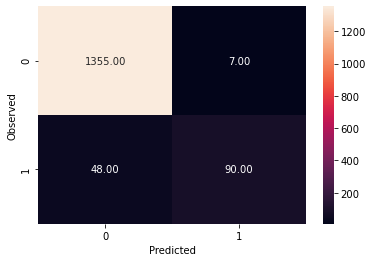

None

Recall: 0.6521739130434783

Precision: 0.9278350515463918

F1 Score: 0.7659574468085106

Roc Auc Score: 0.8235172061546319


In [100]:
print("Trainig accuracy",logreg.score(X_train,y_train))  
print()
print("Testing accuracy",logreg.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

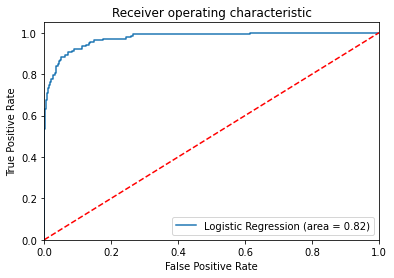

In [101]:

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [102]:

pd.DataFrame(logreg.coef_[0],
             X.columns,
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)

,coef
Education_3,3.268810
Education_2,3.110587
CD Account_1,2.861334
Family_3,1.653696
Family_4,1.553223
CCAvg,0.175387
Income,0.053587
Age,0.003642
Mortgage,0.000777
ZIP Code,-0.000120


In [103]:
logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': False,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 4294967295,
 'solver': 'newton-cg',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [104]:
training_score=[]
testing_score=[]
solving= ['sag','saga','newton-cg']

for x in solving:
    modeling = LogisticRegression(random_state=12, penalty='l2',C=0.75,solver=x)
    modeling.fit(X_train,y_train)
    y_predict = modeling.predict(X_test)
    training_score.append(modeling.score(X_train,y_train))
    testing_score.append(modeling.score(X_test,y_test))
    print(solving)
    print("___________________________")
    print(training_score)
    print("___________________________")
    print(testing_score)
    print("//////////////////////////////////////////////////")

['sag', 'saga', 'newton-cg']
___________________________
[0.9022857142857142]
___________________________
[0.908]
//////////////////////////////////////////////////
['sag', 'saga', 'newton-cg']
___________________________
[0.9022857142857142, 0.9022857142857142]
___________________________
[0.908, 0.908]
//////////////////////////////////////////////////
['sag', 'saga', 'newton-cg']
___________________________
[0.9022857142857142, 0.9022857142857142, 0.958]
___________________________
[0.908, 0.908, 0.964]
//////////////////////////////////////////////////


I tested numerous paramaters and found that adjusting the solver to newton-cg provided the best model

Confusion matrix means True Positive (observed=1,predicted=1):  90

Predicted that the personal loan will be granted and the customer was eligibile for the loan

False Positive (observed=0,predicted=1): 7

Predicted that the perosnal loan will be granted and the customer was not eligibile for the loan

True Negative (observed=0,predicted=0): 1355

Predicted that the personal loan will not be granted and the customer was not eligibile for loan

False Negative (observed=1,predicted=0): 48

Predicted that the personal loan will not be granted and the customer was eligibile for loan

Precision is the important metric in order to reduce False Positives to limit loan loss. 